# Exercise 1
### 1. Download and compile baby names by state dataset.
The step of compiling datasets will be done in the class defined below.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 

### 2. Create a library class called BabyNames: 

In [2]:
class BabyNames(object):
    
    # a. Class Constructor where you pass the file location to create Pandas DataFrame
    def __init__(self, location):
        names = []
        os.chdir(location)
        for i in os.listdir(os.getcwd()):
            if i.endswith('.TXT'):
                with open(i, 'r') as myfile:
                    names.extend(myfile.read().splitlines())
        # list names is a list with each item being a string of a line from the .txt files
        names2 = []
        for i in range(len(names)):
            names2.append(names[i].split(','))
        # names2 is a list now where each item is a list of string: ['state', 'sex', 'year', 'name', 'births']
        names_final = pd.DataFrame(names2, columns=['State', 'Sex', 'Year', 'Name', 'Births'])
        names_final.Births = pd.to_numeric(names_final.Births)

        self.data = names_final
        # now if you call a BabyNamesObject.data it will return you a pd.DataFrame object where births is 
        # numeric and others are strings
    
    # b. Function Count (state=’’, year=’’): returns the total number of births for a given state & year combination
    def Count(self, state=None, year=None):
        if year:
            year = str(year)
        else:
            pass
        
        if not state and not year:
            num_births = sum(self.data.Births)
        elif not state and not not year:
            num_births = sum(self.data.Births[self.data.Year == year])
        elif not not state and not year:
            num_births = sum(self.data.Births[self.data.State == state])
        else:
            num_births = sum(self.data.Births[(self.data.State == state) & (self.data.Year == year)])
        return num_births
    
    # c. Top10BabyNames(state=’IL’, year=2015)
    def Top10BabyNames(self, state=None, year=None):
        if year:
            year = str(year)
        else:
            pass
        
        male = self.data[self.data.Sex == 'M']
        female = self.data[self.data.Sex == 'F']

        if not state and not year:
            topmale = list(male.groupby(by='Name').sum().nlargest(10, 'Births').index)
            topfemale = list(female.groupby(by='Name').sum().nlargest(10, 'Births').index)
        elif not state and not not year:
            topmale = list(male[male.Year == year].groupby(by='Name').sum().nlargest(10, 'Births').index)
            topfemale = list(female[female.Year == year].groupby(by='Name').sum().nlargest(10, 'Births').index)
        elif not not state and not year:
            topmale = list(male[male.State == state].groupby(by='Name').sum().nlargest(10, 'Births').index)
            topfemale = list(female[female.State == state].groupby(by='Name').sum().nlargest(10, 'Births').index)
        else:
            topmale = list(male[(male.State == state) & (male.Year == year)].groupby(by='Name').sum().nlargest(10, 'Births').index)
            topfemale = list(female[(female.State == state) & (female.Year == year)].groupby(by='Name').sum().nlargest(10, 'Births').index)

        topbaby = pd.DataFrame({'Rank':list(range(1,11)), 'Male': topmale, 'Female':topfemale})
        topbaby = topbaby[['Rank', 'Male','Female']]

        return topbaby
        
    # d. ChangeOfPopularity(fromYear=2014, toYear=2015, top=10): 
    # This function returns a table w/ 3 columns showing changes in popularity of names over the given time period 
    # column (i) shows baby names that increased in popularity in the given time period
    # column (ii) shows baby names that increased in popularity in the given time period
    # column (iii) shows baby names that stayed the same in popularity in the given time period
    def ChangeOfPopularity(self, fromYear=1910, toYear=2017, top=10):
        fromYear = fromYear if fromYear <=2017 and fromYear >=1910 else 1910 
        toYear = toYear if toYear <=2017 and toYear >=1910 else 2017 
        male = self.data[(self.data.Year == str(fromYear))|(self.data.Year == str(toYear))][self.data.Sex == 'M']
        female = self.data[(self.data.Year == str(fromYear))|(self.data.Year == str(toYear))][self.data.Sex == 'F']
        
        for df in (male, female):
        
            increase_list = []
            decrease_list = []
            nochange_list = []

            name_toyear = list(df.Name[df.Year == str(toYear)])
            name_fromyear = list(df.Name[df.Year == str(fromYear)])

            name_overlap = set(name_toyear).intersection(name_fromyear)

            for name in name_overlap:
                count_toyear = sum(df.Births[(df.Year == str(toYear))&(df.Name==name)])
                count_fromyear = sum(df.Births[(df.Year == str(fromYear))&(df.Name==name)])

                if count_toyear - count_fromyear > 20:
                    increase_list.append(name)
                elif count_fromyear - count_toyear  > 20:
                    decrease_list.append(name)
                else:
                    nochange_list.append(name) 

            l_inc,l_dec,l_noch = len(increase_list),len(decrease_list),len(nochange_list)
            max_len = max([l_inc,l_dec,l_noch])
            increase_list.extend(['']*(max_len-l_inc))
            decrease_list.extend(['']*(max_len-l_dec))
            nochange_list.extend(['']*(max_len-l_noch))
            lists_for_final = [increase_list, decrease_list, nochange_list]

            print("Change In Popularity By Gender\n")
            print(pd.DataFrame({"Increased Over Time Period" : increase_list,
                  "Decreased Over Time Period" : decrease_list,
                  "No Change Over Time Period" : nochange_list}).head(top))      
    
    #e. Top5NamesPerYear(year=2015,sex=’’): Returns a table that show the five most
    # frequent given names, by State, for male, female, or both in a given year.
    # The number to the right of each name is the number of occurrences in the data.
    def Top5NamesPerYear(self, year=1910, sex='M'):
        df = self.data[self.data.Year == str(year)]
        
        final_dict = {}
        for State in df.State.unique():
            if sex == 'M':
                df_new = df[(df.State==State)&(df.Sex=='M')].sort_values('Births',ascending=False).head(5)
                final_dict[State] = [(row['Name'],row['Births']) for index,row in df_new.iterrows()]
            elif sex == 'F':
                df_new = df[(df.State==State)&(df.Sex=='F')].sort_values('Births',ascending=False).head(5)
                final_dict[State] = [(row['Name'],row['Births']) for index,row in df_new.iterrows()]
            else:
                df_new = df[df.State==State].sort_values('Births',ascending=False).head(5)
                final_dict[State] = [(row['Name'],row['Births']) for index,row in df_new.iterrows()]
            final_df = pd.DataFrame([[key, final_dict[key][0][0], final_dict[key][0][1],\
                                          final_dict[key][1][0], final_dict[key][1][1],\
                                          final_dict[key][2][0], final_dict[key][2][1],\
                                          final_dict[key][3][0], final_dict[key][3][1],\
                                          final_dict[key][4][0], final_dict[key][4][1],\
                                          ] for key in final_dict], columns=['State','Rank 1','Count','Rank 2','Count','Rank 3','Count',\
                                                                             'Rank 4','Count','Rank 5','Count'])
        return final_df 
    
    
    #f. This function NamePopularityPlot will create a plot file that shows the name popularity changes over the time range.
    # (popularity is based on the proportional use of the name within a state and year)
    def NamePopularityPlot(self, name, yearRange, state='', sex=''):
        yearRange = [*range(yearRange[0],yearRange[1]+1,1)]
        yearRange = [str(year) for year in yearRange]
        df = self.data[self.data.Year.isin(yearRange)]
        df = df[df.Name == name]
        if sex == 'M':
            df = df[df.Sex == 'M']
        elif sex =='F':
            df = df[df.Sex == 'F']
        if state != '':
            df = df[df.State == state]
        df = df[df.Births >= 5]
        total_dict = {}
        for year in yearRange:
            total_dict[year] = df.Births[df.Year==year].sum()
        prop_dict = {}
        for index, row in df.iterrows():
            prop_dict[row['Year']] = round(row['Births']/total_dict[row['Year']]*100, 3)
        
        plt.scatter([*prop_dict.keys()],[*prop_dict.values()])
        plt.plot([*prop_dict.keys()],[*prop_dict.values()])
        plt.title('Popularity of {} from {} - {}'.format(name,yearRange[0],yearRange[-1]))
        plt.ylabel('Popularity of Name (%)')
        plt.xlabel('Year')
        plt.xticks(rotation=65)
        plt.show()
    
    #g. This function Lists the top n names that flipped over the years.
    #(i.e. from boy name to girl or the reverse). 
    # It also Provides a plot of the names showing the year.
    def NameFlip(self, n=10):
        df = self.data.drop(columns='State')
        df = df.groupby(['Name', 'Year', 'Sex'], as_index=False).sum()
        df = df[df.Births >= 50]
        yearRange = [*range(1910,2011,20)]
        yearRange = [str(year) for year in yearRange]
        df = df[df.Year.isin(yearRange)]
        
        def m_or_f(df, name, year):
            df = df[df.Name == name]
            df = df[df.Year == str(year)]
            m_count = df[df.Sex == 'M'].Births.sum()
            f_count = df[df.Sex == 'F'].Births.sum()
            if m_count >= f_count:
                return ('M', m_count, f_count)
            else:
                return ('F', f_count, m_count)
            
        def num_of_flips(list_of_year_sex):
            flip_count = 0
            for index in range(len(list_of_year_sex)-1):
                if list_of_year_sex[index][1][0] != list_of_year_sex[index+1][1][0]:
                    flip_count+=1 
            return flip_count
        
        names_gender_dict = {}
        for name in df.Name.unique():
            name_df = df[df.Name==name]
            names_gender_dict[name] = []
            for index, row in name_df.iterrows():
                names_gender_dict[name].append((row['Year'], m_or_f(df, name, row['Year'])))
        names_that_flipped = []
        for key in names_gender_dict:
            if num_of_flips(names_gender_dict[key]) > 0: 
                names_that_flipped.append((key, num_of_flips(names_gender_dict[key])))
        names_that_flipped = sorted(names_that_flipped, key=lambda tup: tup[1], reverse=True)[:n]
        print(names_that_flipped)
        
        names = [x[0] for x in names_that_flipped]         
        for name in names:
            name_df = df[df.Name==name]            
    
            name_df = name_df.pivot_table(values='Births', index=['Year'],columns=['Sex'], 
                                   aggfunc=np.sum)
            name_df.plot(title='Popularity of "{}" over Year'.format(name))
            
        
    def Story(self):
        
        print('''
The name Luke is a fairly common name in the US. One of the most famous Luke's, 
maybe the second most famous after the Christian Disciple and Eponymous book 
in the Christian Bible, is Luke Skywalker. This made me wonder if the name Luke 
became more popular when Star Wars was first released and the character made 
his debut. I Plotted the Popularity of Luke as a % of overall births and marked 
the release of the Star Wars Original Trilogy Dates (1977, 1980, 1983)        
        ''')
        
        
        df = self.data
        df = df.groupby(['Name', 'Year'], as_index=False).sum()
        total_births = df.Births.sum()
        df = df[df.Name == 'Luke']
        df.Year = pd.to_numeric(df.Year)
        df['Popularity'] = df['Births']/total_births*100
        ax = df.plot(title='Popularity (% of overall births) of "Luke" by Year',x='Year', y='Popularity')
        ax.axvline(1977, color='r')
        ax.axvline(1980, color='r')
        ax.axvline(1983, color='r')
        plt.show()
        
        
        print('''
As we can see above, there was a large spike following the 1977 original release of Star Wars. 
The release of the second film coincided with an even larger spike.        
        ''')
        
        print('''
I was curious about this phenomenon for other Star Wars films, and (seen below) I found that once again 
with the release of the prequel trilogy in 1999, 2002, and 2005, we saw a similar spike 
in the name of the main character - Anakin. Particularly in 2005.        
        ''')
        
        df2 = self.data
        df2 = df2.groupby(['Name', 'Year'], as_index=False).sum()
        df2 = df2[df2.Name == 'Anakin']
        df2.Year = pd.to_numeric(df2.Year)
        df2['Popularity'] = df2['Births']/total_births*100
        ax2 = df2.plot(title='Popularity (% of overall births) of "Anakin" by Year',x='Year', y='Popularity')
        ax2.axvline(1999, color='r')
        ax2.axvline(2002, color='r')
        ax2.axvline(2005, color='r')
        plt.show()
        
        
        print('''
I then tested this hypothesis once more for the newest set of Star Wars films and saw
that the protagonists name, Rey, also shows a steep upward trend, accelerating since
the release of that movie.        
        ''')
        
        df3 = self.data
        df3 = df3.groupby(['Name', 'Year'], as_index=False).sum()
        df3 = df3[df3.Name == 'Rey']
        df3.Year = pd.to_numeric(df3.Year)
        df3['Popularity'] = df3['Births']/total_births*100
        ax3 = df3.plot(title='Popularity (% of overall births) of "Rey" by Year',x='Year', y='Popularity')
        ax3.axvline(2015, color='r')
        ax3.axvline(2017, color='r')
        plt.show()
        

In [3]:
BabyNamesObject = BabyNames('/nfs/home/naf445/z/422 Java & Python/Projects/Project1 Personal/NamesByState')

In [4]:
BabyNamesObject.Count(state='AL', year=1950)

74866

In [5]:
BabyNamesObject.Top10BabyNames(state='TN', year=1925)

,Rank,Male,Female
0,1,James,Mary
1,2,William,Dorothy
2,3,John,Helen
3,4,Robert,Margaret
4,5,Charles,Mildred
5,6,George,Ruby
6,7,Thomas,Betty
7,8,Paul,Ruth
8,9,Edward,Martha
9,10,Willie,Virginia


In [6]:
BabyNamesObject.ChangeOfPopularity(fromYear=1940, toYear=1975, top=10)
#~20 seconds

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:76: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Change In Popularity By Gender

  Increased Over Time Period Decreased Over Time Period  \
0                  Guillermo                      Garry   
1                      Miles                       Hoyt   
2                       Aldo                     Jessie   
3                    Rodrigo                    Carroll   
4                       Neil                      Wiley   
5                  Cornelius                      Odell   
6                      Ramon                     Weldon   
7                     Lamont                      Major   
8                    Roberto                     Calvin   
9                    Marcelo                     Junius   

  No Change Over Time Period  
0                    Carlton  
1                     Silvio  
2                     Vaughn  
3                   Catarino  
4                    Gennaro  
5                     Antone  
6                      Romeo  
7                     Cirilo  
8                     Prince  
9       

In [7]:
BabyNamesObject.Top5NamesPerYear(year=2000, sex='F')

,State,Rank 1,Count,Rank 2,Count,Rank 3,Count,Rank 4,Count,Rank 5,Count
0,AK,Hannah,58,Madison,50,Emily,48,Sarah,39,Ashley,36
1,AL,Hannah,443,Anna,386,Madison,382,Emily,371,Sarah,305
2,AR,Hannah,288,Madison,271,Emily,240,Alexis,177,Sarah,169
3,AZ,Emily,408,Ashley,400,Samantha,397,Alexis,380,Jessica,365
4,CA,Emily,2958,Ashley,2831,Samantha,2579,Jessica,2484,Jennifer,2263
5,CO,Emily,366,Hannah,322,Madison,321,Ashley,285,Emma,269
6,CT,Emily,335,Sarah,257,Samantha,254,Olivia,252,Hannah,240
7,DC,Kayla,74,Katherine,56,Elizabeth,51,Destiny,49,Jordan,45
8,DE,Emily,80,Sarah,75,Kayla,65,Madison,64,Alexis,61
9,FL,Emily,1205,Ashley,1022,Hannah,1016,Samantha,954,Sarah,922


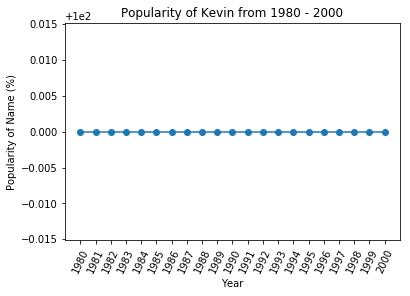

In [8]:
BabyNamesObject.NamePopularityPlot('Kevin', (1980, 2000), state='AR', sex='M')

[('Angel', 2), ('Carey', 2), ('Elisha', 2), ('Jessie', 2), ('Kristian', 2), ('Addison', 1), ('Arden', 1), ('Ariel', 1), ('Ashton', 1), ('Aubrey', 1)]


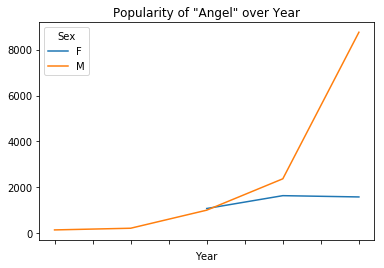

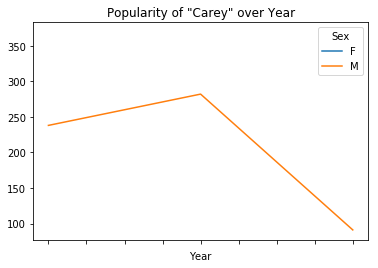

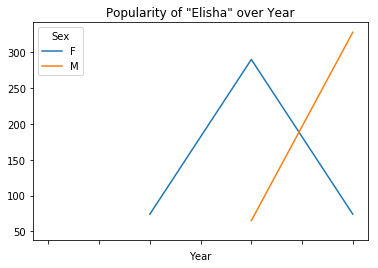

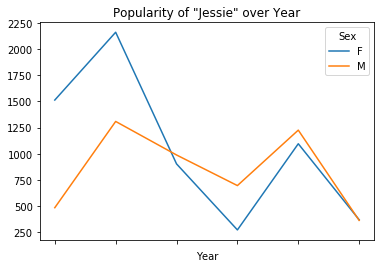

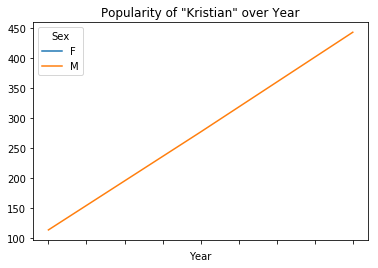

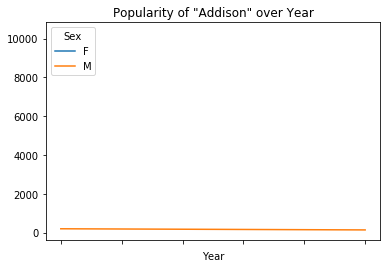

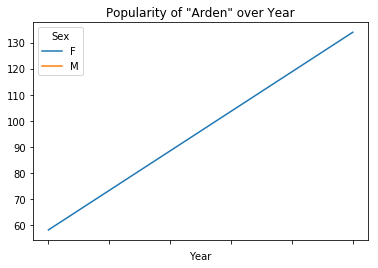

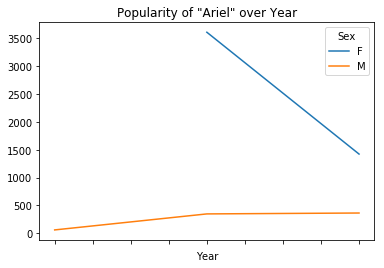

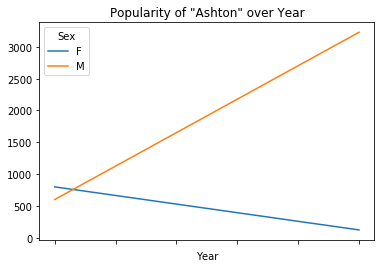

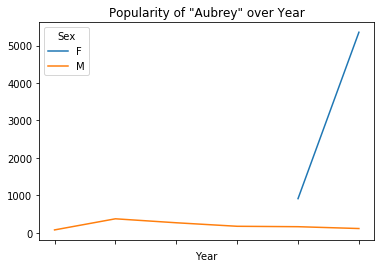

In [9]:
BabyNamesObject.NameFlip()
#~30 Seconds

# Exercise 2

In [10]:
import pymysql
import pandas as pd


cnx = pymysql.connect("localhost","MSiA422","MSIA422","world" )


city = pd.read_sql_query('select * from city', con=cnx)
country = pd.read_sql_query('select * from country', con=cnx)
countrylanguage = pd.read_sql_query('select * from countrylanguage', con=cnx)


ModuleNotFoundError: No module named 'pymysql'

## Query 1

select * 
<br>from country
<br>where population > 50000000
<br>order by population DESC limit 10;

**Desciption:**
<br>This statement returns top 10 countries with greatest population whose population is greater than 50000000.

In [ ]:
country[country.Population>50000000].sort_values(by='Population', ascending=False).head(10)


Compare results with SQL statement.

In [ ]:
sql = 'select * \
       from country \
       where population > 50000000 \
       order by population DESC limit 10'

pd.read_sql_query(sql, con=cnx)

## Query 2 

select Continent, count(*) As Number_Countries, sum(population) As Population 
<br>from country
<br>where population > 0
<br>group by Continent
<br>order by 1 ASC;

**Desciption:**
<br>This statement only keeps countries with positive population, and then returns the name of each continent, the number of countries and the total population in each continent. In the end the result is sorted by continent name alphabetically. 

In [ ]:
country[country.Population>0].groupby(by = 'Continent').agg({'Name':'count','Population':'sum'}).rename(columns={'Name':'Number_Countries'})


Compare results with SQL statement.

In [ ]:
sql = 'select Continent, count(*) As Number_Countries, sum(population) As Population from country \
       where population > 0 \
       group by Continent \
       order by 1 ASC' 

pd.read_sql_query(sql, con=cnx)

## Query 3
select city.Name As City, city.population
<br>from city
<br>inner join country ON city.CountryCode = country.code
<br>where country.code = 'USA'
<br>order by city.population DESC limit 10

**Desciption:**
<br>This statement selects top 10 cities with greatest population in USA.

In [ ]:
df_city_country = pd.merge(city, country, how='inner', left_on='CountryCode', right_on='Code')
df_city_country[['Name_x','Population_x']][df_city_country.Code=='USA'].sort_values(by='Population_x', ascending=False).rename(columns={'Name_x':'City','Population_x':'Population'}).head(10)


Compare results with SQL statement.

In [ ]:
sql = 'select city.Name As City, city.population \
       from city \
       inner join country ON city.CountryCode = country.code \
       where country.code = "USA" \
       order by city.population DESC limit 10' 

pd.read_sql_query(sql, con=cnx)

## Query 4
select country.Name, Language, (Percentage * population) / 100
<br>from countrylanguage
<br>inner join country on countrylanguage.CountryCode = country.code
<br>where IsOfficial = True
<br>order by 3 DESC limit 10;

**Description:**
<br>This statement firstly returns official language for each country and corresponding amount of population who speaks that language. Then it selects top 10 countries with largest amount of population speaking their official language.

In [ ]:
df_country_lang = pd.merge(countrylanguage, country, how='inner', left_on='CountryCode', right_on='Code')
df_country_lang['Amount'] = df_country_lang.Percentage * df_country_lang.Population / 100
df_country_lang[['Name','Language','Amount']][df_country_lang.IsOfficial=='T'].sort_values(by='Amount', ascending=False).head(10)


Compare results with SQL statement.

In [ ]:
sql = 'select country.Name, Language, (Percentage * population) / 100 \
       from countrylanguage \
       inner join country on countrylanguage.CountryCode = country.code \
       where IsOfficial = True \
       order by 3 DESC limit 10' 

pd.read_sql_query(sql, con=cnx)

## Query 5

select Language, sum((Percentage * population) / 100)
<br>from countrylanguage
<br>inner join country ON countrylanguage.CountryCode = country.code
<br>group by Language
<br>order by 2 desc limit 5;

**Description:**
<br>This statement checks the total amount of population for each language and then selects top 5 languages with largest amount of population speaking their official language.

In [ ]:
df_country_lang.groupby(by='Language').agg({'Amount':'sum'}).sort_values(by='Amount', ascending=False).head(5)


Compare results with SQL statement.

In [ ]:
sql = 'select Language, sum((Percentage * population) / 100) \
       from countrylanguage \
       inner join country ON countrylanguage.CountryCode = country.code \
       group by Language \
       order by 2 desc limit 5' 

pd.read_sql_query(sql, con=cnx)